# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(ggrepel)

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv]()

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [3]:
vacc = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv',
         col_types = cols())

The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [4]:
# create the df_vacc_rates here
df_vacc_rates = 
vacc  %>% 
    filter(mmr >= 0)  %>% 
    group_by(state)  %>% 
    summarize(vacc_rate = (sum(mmr >= 95, na.rm=TRUE)/n()))  %>% 
    print


# A tibble: 21 × 2
   state         vacc_rate
   <chr>             <dbl>
 1 Arizona         0.506  
 2 Arkansas        0.00353
 3 California      0.889  
 4 Colorado        0.623  
 5 Connecticut     0.812  
 6 Illinois        0.897  
 7 Maine           0.473  
 8 Massachusetts   0.866  
 9 Minnesota       0.474  
10 Missouri        0.68   
# … with 11 more rows


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [5]:
df_vacc_rates  %>%
    select(state, vacc_rate)  %>% 
    summarize(min_vacc_rate = min(vacc_rate))  %>% 
    print

df_vacc_rates  %>% 
    arrange(vacc_rate)  %>% 
    print

#How do I output the specific state this is

# A tibble: 1 × 1
  min_vacc_rate
          <dbl>
1       0.00353
# A tibble: 21 × 2
   state        vacc_rate
   <chr>            <dbl>
 1 Arkansas       0.00353
 2 Washington     0.327  
 3 North Dakota   0.456  
 4 Maine          0.473  
 5 Minnesota      0.474  
 6 Ohio           0.492  
 7 Arizona        0.506  
 8 Oregon         0.593  
 9 Colorado       0.623  
10 Texas          0.626  
# … with 11 more rows


Make a ECDF plot of the school vaccination rates in North Carolina. Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [6]:
df_nc_vacc = vacc  %>% 
    filter(state == "North Carolina")

In [7]:
ecdf = df_nc_vacc %>%
    arrange(overall !=-1 ) %>%
    mutate(rn = row_number(), fraction_of_schools = rn / max(rn))

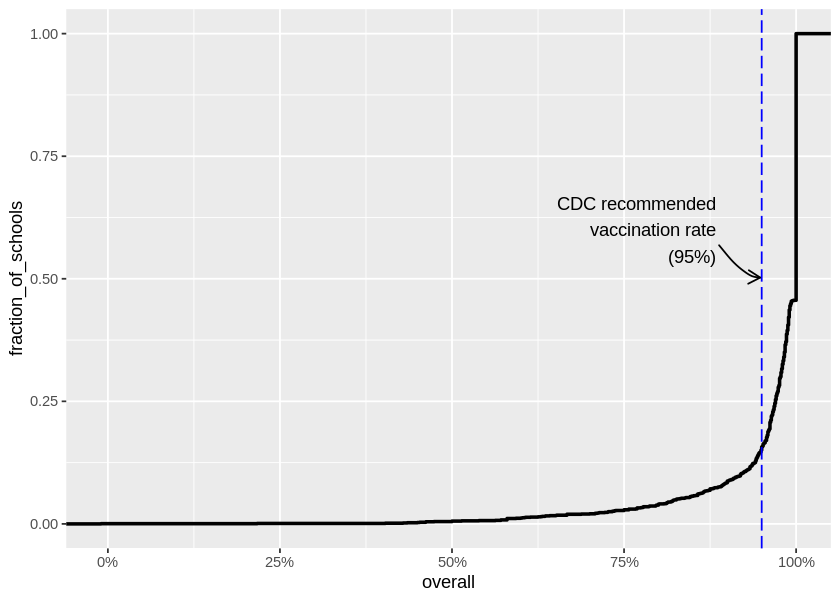

In [13]:
options(repr.plot.res = 120, repr.plot.height = 5, repr.plot.width = 7)

label = data.frame(overall = 95, fraction_of_schools = 0.5)


p = ggplot(ecdf, aes(x = overall, y = fraction_of_schools) )

#p = p + geom_point()

p = p + stat_ecdf(geom = "step", size =1, alpha = 1)

p = p + geom_vline(aes(xintercept = 95), color = 'blue', linetype="longdash")

p = p + scale_x_continuous(labels = scales::label_percent(scale = 1))

p = p + geom_text_repel(
    data = label, 
    nudge_x = -7.5,
    nudge_y = 0.10,
    segment.curvature = 0.1,
    label = "CDC recommended\n vaccination rate\n (95%)",
    hjust= "right",
    arrow = arrow(length = unit(0.025, "npc"))
)

p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

 ![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

## Is the median vaccination rate for NC schools above the CDC recommended target?

Yes it is, and we see this because at 0.5 on the y-axis (which is the median), our ECDF line is past the 95% recommended target we have shown with the dashed line


